In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


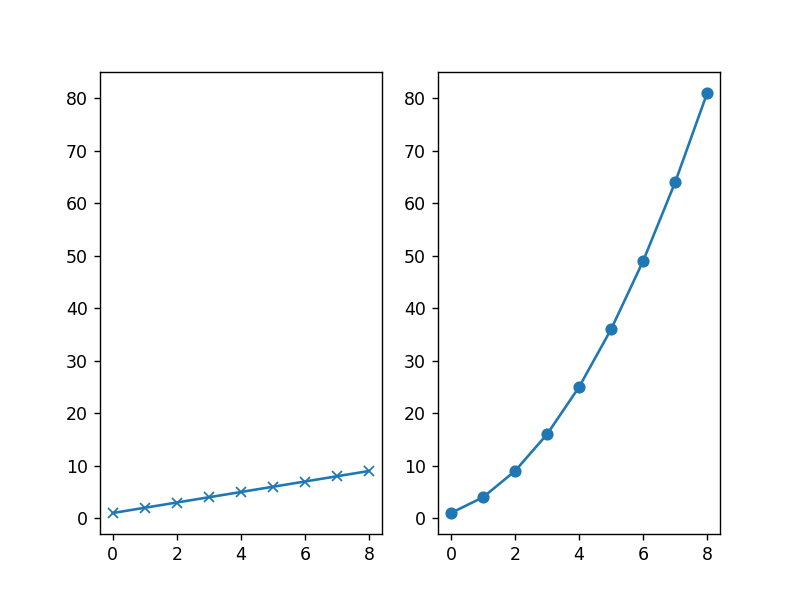

In [6]:
linear_data = np.array([1,2,3,4,5,6,7,8,9])
expotential_data = linear_data**2
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data,'-x')
ax2 = plt.subplot(1,2,2,sharey=ax1)
plt.plot(expotential_data,'-o')

<IPython.core.display.Javascript object>


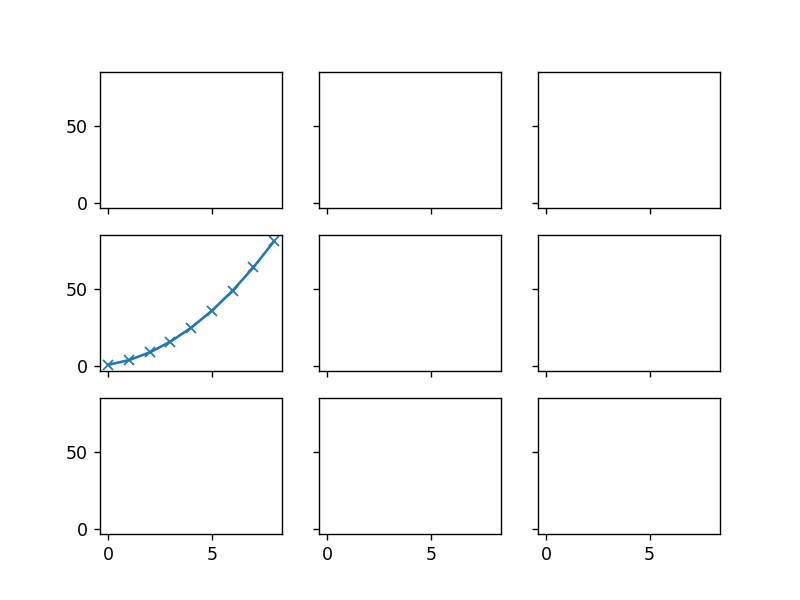

In [15]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex = True,
                                                             sharey = True)
ax4.plot(expotential_data,'-x')
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)



plt.gcf().canvas().draw()

# Histgram

<IPython.core.display.Javascript object>


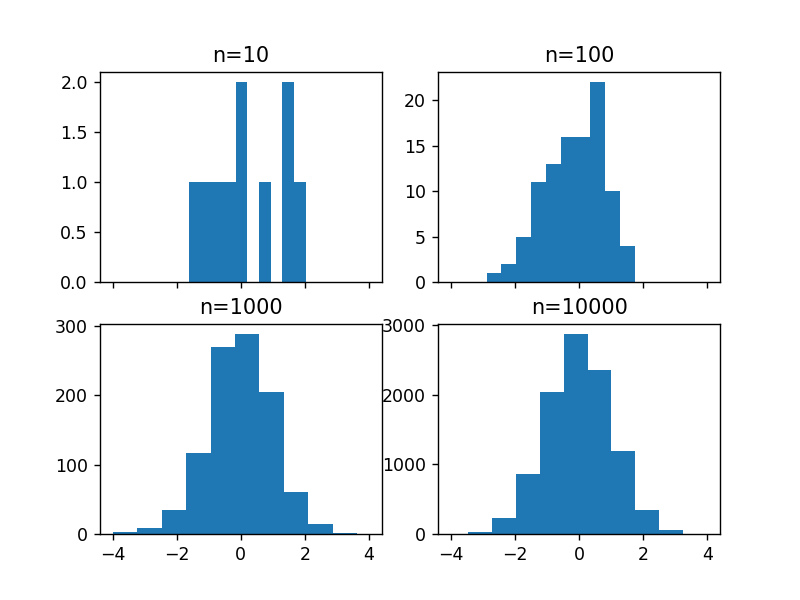

In [20]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0,scale=1,size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


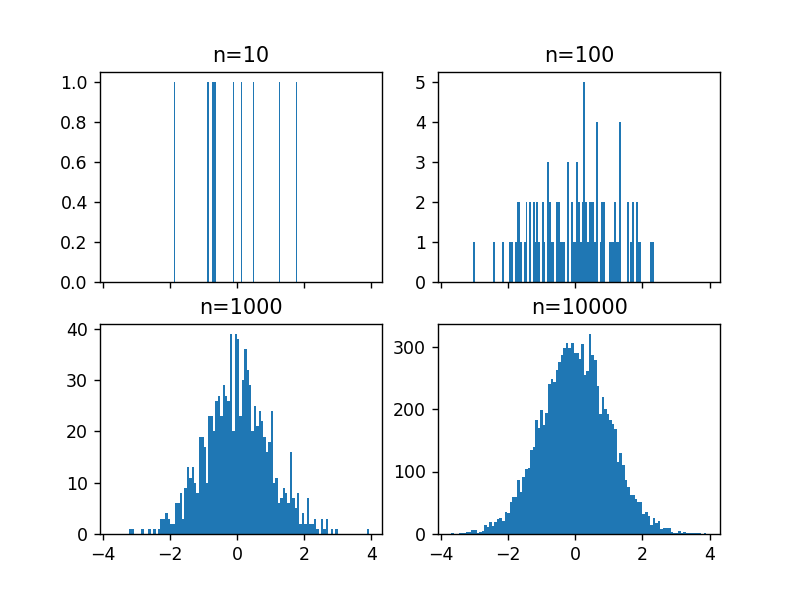

In [21]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0,scale=1,size=sample_size)
    axs[n].hist(sample,bins= 100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


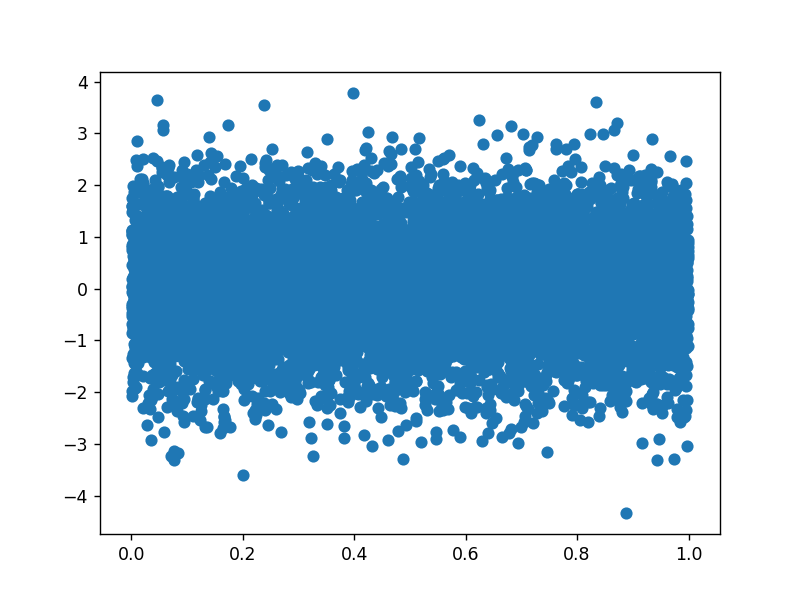

In [24]:
plt.figure()
X = np.random.random(size=10000)
Y = np.random.normal(loc=0,scale = 1,size = 10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


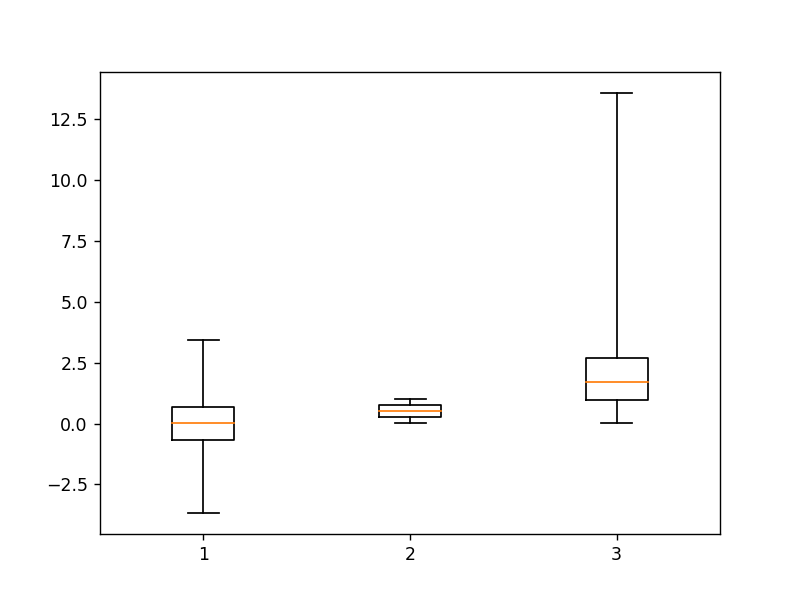

In [25]:
import matplotlib.gridspec as gridspec
plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0,1:])
side_histogram = plt.subplot(gspec[1:,0])
lower_right = plt.subplot(gspec[1:,1:])

In [26]:
X = np.random.random(size=10000)
Y = np.random.normal(loc=0,scale=1,size=10000)
lower_right.scatter(X,Y)
top_histogram.hist(X,bins = 100)
s = side_histogram.hist(Y,bins=100,orientation='horizontal')

In [30]:
top_histogram.clear()
top_histogram.hist(X,bins=100,density=True)
side_histogram.clear()
side_histogram.hist(Y,bins=100,density=True,orientation='horizontal')
side_histogram.invert_xaxis()

In [31]:
for ax in [top_histogram,lower_right]:
    ax.set_xlim(0,1)
for ax in [side_histogram,lower_right]:
    ax.set_ylim(-5,5)

# Box

In [32]:
import pandas as pd
normal_sample = np.random.normal(size = 10000,loc=0,scale=1)
random_sample = np.random.random(size = 10000)
gamma_sample = np.random.gamma(2,size = 10000)

df = pd.DataFrame({'normal':normal_sample,
                  'random':random_sample,
                  'gamma':gamma_sample}
)

In [33]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.004178,0.503876,2.008412
std,1.013212,0.288915,1.425032
min,-3.672246,0.000224,0.018022
25%,-0.690572,0.255167,0.962443
50%,0.011209,0.506202,1.688662
75%,0.688658,0.753391,2.693951
max,3.432212,0.999941,13.561115


<IPython.core.display.Javascript object>


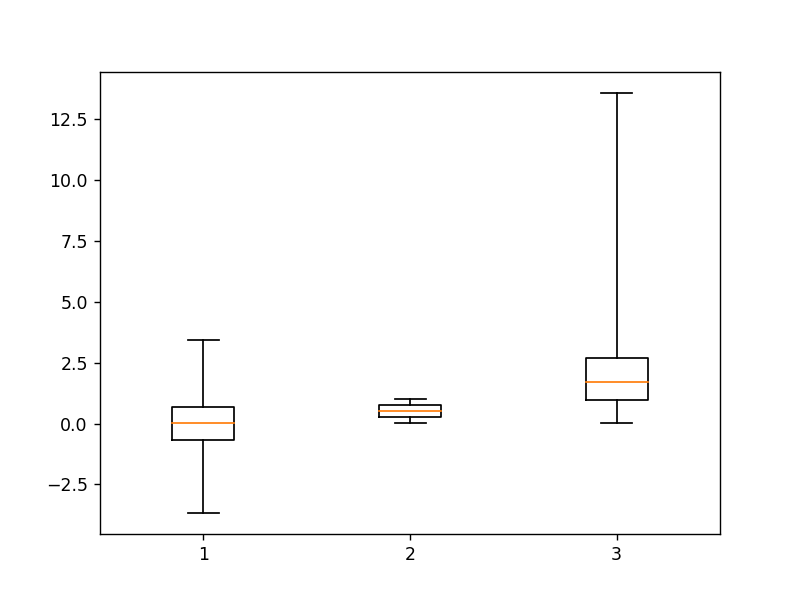

In [42]:
plt.figure()
fig = plt.boxplot([df['normal'],df['random'],df['gamma']],whis='range')

<IPython.core.display.Javascript object>


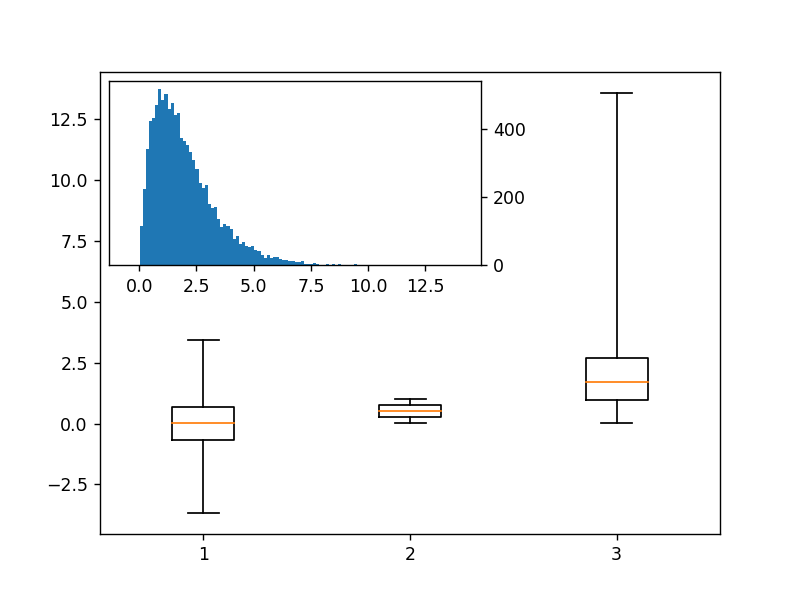

In [54]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.figure()
plt.boxplot([df['normal'],df['random'],df['gamma']],whis = 'range')
ax2 = mpl_il.inset_axes(plt.gca(),width='60%',height='40%',loc=2)
ax2.hist(df['gamma'],bins=100)
ax2.margins(x=0.1)
ax2.yaxis.tick_right()

# Heat map

<IPython.core.display.Javascript object>


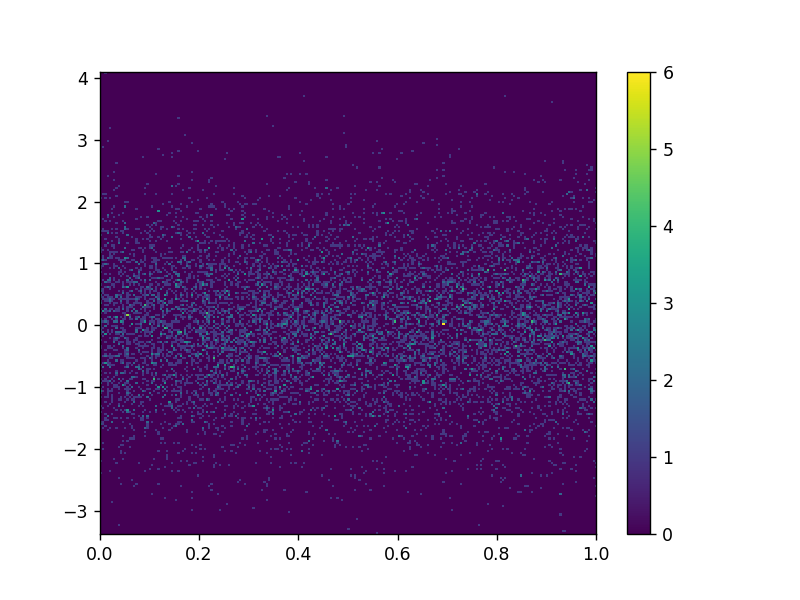

In [5]:
plt.figure()
X = np.random.random(size=10000)
Y = np.random.normal(loc=0,scale=1,size=10000)
_ = plt.hist2d(X,Y,bins = 225)
plt.colorbar()

In [14]:
import matplotlib.animation as animation
n = 1000
x = np.random.randn(n)

In [17]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4,4,0.2)
    plt.hist(x[:curr],bins = bins)
    plt.axis([-4,4,0,100])
    plt.gca().set_title('Sampling Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n={}'.format(curr),[3,27])

<IPython.core.display.Javascript object>


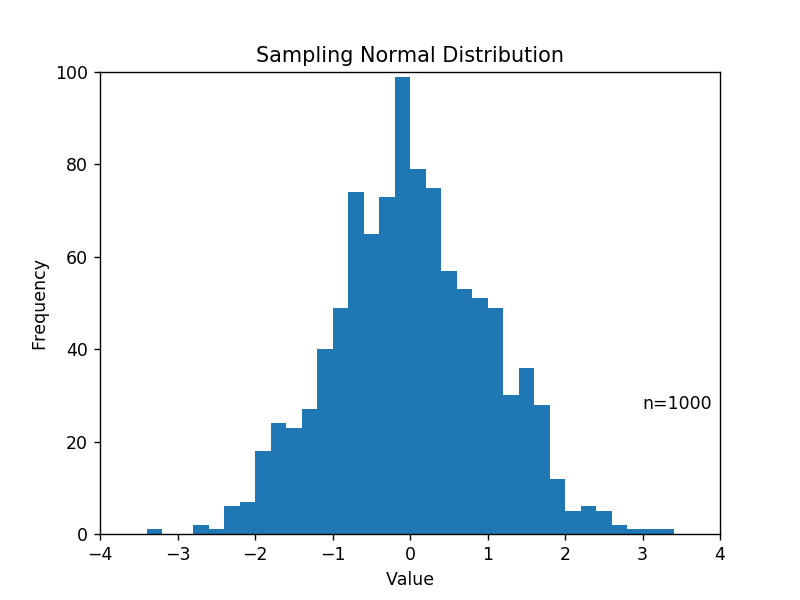

In [19]:
fig = plt.figure()
a = animation.FuncAnimation(fig,update,interval =10)